In [3]:
# Import neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:

# Load the dataset 

df = pd.read_csv("train.csv")

df.head(5)




,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [17]:
print(df.shape)

(79023, 76)


In [18]:
print(df.dtypes)

ID_LAT_LON_YEAR_WEEK           object
latitude                      float64
longitude                     float64
year                            int64
week_no                         int64
                               ...   
Cloud_sensor_azimuth_angle    float64
Cloud_sensor_zenith_angle     float64
Cloud_solar_azimuth_angle     float64
Cloud_solar_zenith_angle      float64
emission                      float64
Length: 76, dtype: object


In [19]:
print(df.isnull().sum())


ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    484
Cloud_sensor_zenith_angle     484
Cloud_solar_azimuth_angle     484
Cloud_solar_zenith_angle      484
emission                        0
Length: 76, dtype: int64


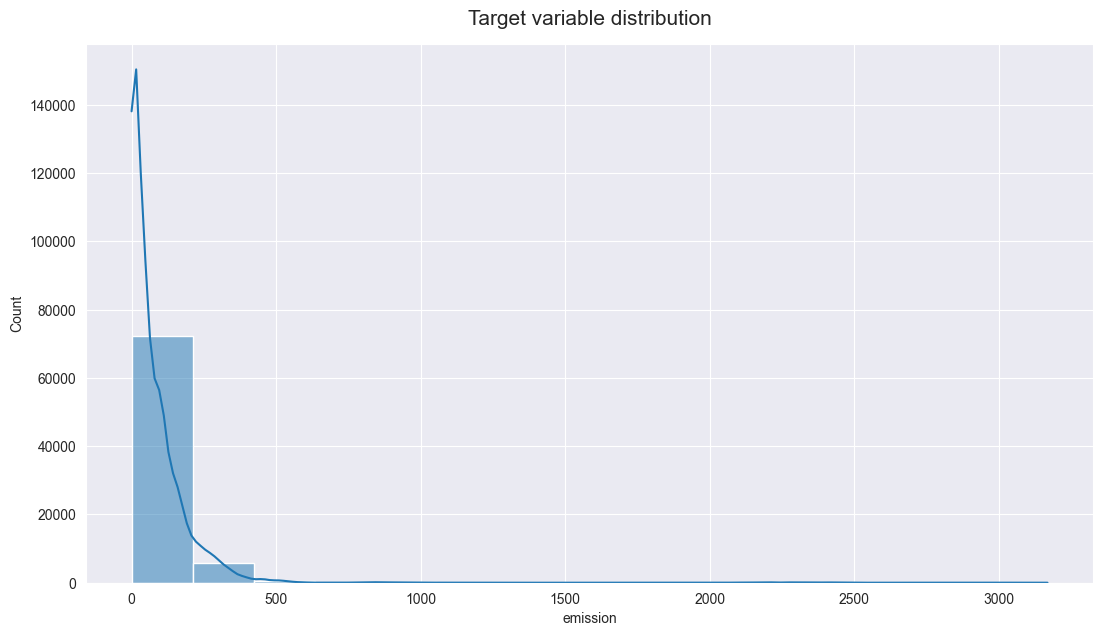

None

10.173825825101622

In [22]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(df.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), df.emission.skew())


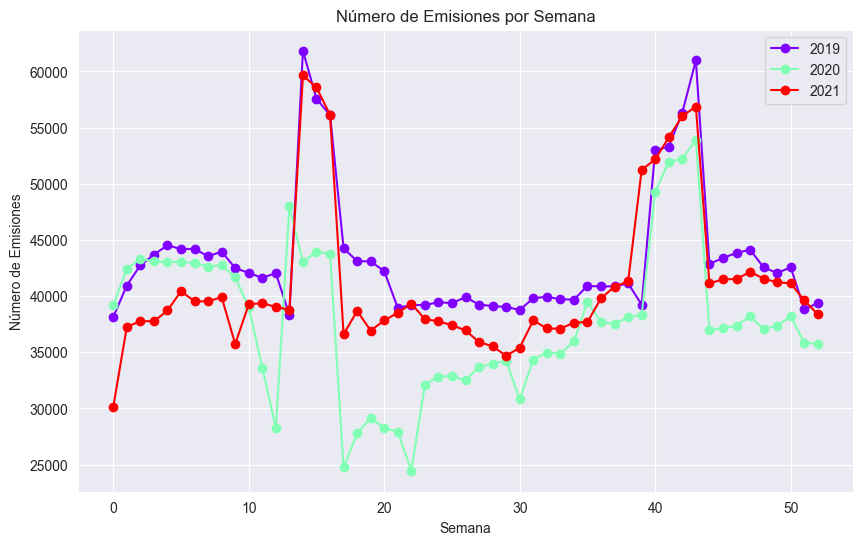

In [26]:
grouped_data = df.groupby(['year', 'week_no'])['emission'].sum().reset_index()

# Obtener una lista de años únicos y asignar colores
unique_years = grouped_data['year'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_years)))

# Crear la gráfica con colores diferentes para cada año
plt.figure(figsize=(10, 6))
for i, year in enumerate(unique_years):
    year_data = grouped_data[grouped_data['year'] == year]
    plt.plot(year_data['week_no'], year_data['emission'], marker='o', color=colors[i], label=year)

plt.title('Número de Emisiones por Semana')
plt.xlabel('Semana')
plt.ylabel('Número de Emisiones')
plt.legend()
plt.grid(True)
plt.show()

